In [1]:
import time
import numpy as np
import sys

In [2]:
import data_fitting as f    # functions to determine centroid, angle, and slope.
import profile_scan as p    # functions to create a surface profile

In [3]:
import instrumental                              # instrumental used to install camera drivers

from instrumental.drivers.cameras import uc480   # imports ThorLabs uc480 camera driver
cam = uc480.UC480_Camera() 
cam.set_defaults(exposure_time = '0.000001s')    # exposure time 1 microsecond to prevent saturation

In [7]:
import thorlabs_apt as apt                      # drivers for motorized linear stages
                                                # will cause a python crash if run with stages already initialized

In [8]:
apt.list_available_devices()                    # lists serial numbers of motorized linear stages
                                                # if null array returned, restart jupyter notebook from command prompt

[(31, 27002870), (31, 27002907)]

In [6]:
stage_x = apt.Motor(27002907)                 # initializes stages by serial number
stage_y = apt.Motor(27002870)

stage_x.enable()
stage_y.enable()

stage_x.move_home(True)                       # moves stages to 0.0000, takes ~10s each stage
stage_y.move_home(True)

In [9]:
# Surface Scanning Inputs

num_samples = 10                               # total number of scan positions
num_tests_per_sample = 5                       # number of tests per position
x = np.zeros((num_samples,num_tests_per_sample))
y = np.zeros((num_samples,num_tests_per_sample))
dx = np.zeros((num_samples,num_tests_per_sample))
dy = np.zeros((num_samples,num_tests_per_sample))

In [10]:
# Scan the surface

for i in range(num_samples):
    print('Scan {}:'.format(i+1))
    x_in = float(input("Enter x-position of mirror:"))
    y_in = float(input("Enter y-position of mirror:"))
    for j in range(num_tests_per_sample):
        print('     Test {}' .format(j+1))
        stage_x.move_to(x_in)
        stage_y.move_to(y_in)
        x[i][j] = x_in
        y[i][j] = y_in
        data = cam.grab_image()
        # dx[i][j],dy[i][j] = f.slopes(data)

Sample number 1:
Enter x-position of mirror:0.1
Enter y-position of mirror:0.2
     Test 1
     Test 2
     Test 3
     Test 4
     Test 5
Sample number 2:
Enter x-position of mirror:0.9
Enter y-position of mirror:0.7
     Test 1
     Test 2
     Test 3
     Test 4
     Test 5
Sample number 3:
Enter x-position of mirror:0.8
Enter y-position of mirror:0.7
     Test 1
     Test 2
     Test 3
     Test 4
     Test 5
Sample number 4:
Enter x-position of mirror:0.6
Enter y-position of mirror:0.5
     Test 1
     Test 2
     Test 3
     Test 4
     Test 5
Sample number 5:
Enter x-position of mirror:0.6
Enter y-position of mirror:0.4
     Test 1
     Test 2
     Test 3
     Test 4
     Test 5
Sample number 6:
Enter x-position of mirror:0.8
Enter y-position of mirror:0.9
     Test 1
     Test 2
     Test 3
     Test 4
     Test 5
Sample number 7:
Enter x-position of mirror:1
Enter y-position of mirror:1.1
     Test 1
     Test 2
     Test 3
     Test 4
     Test 5
Sample number 8:
Enter x-posi

In [11]:
print(x)
print(dx)

np.savetxt("dx_curved.csv", dx, delimiter=",", fmt = '%s')
np.savetxt("x_curved.csv", x, delimiter=",", fmt = '%s')

[[0.1 0.1 0.1 0.1 0.1]
 [0.9 0.9 0.9 0.9 0.9]
 [0.8 0.8 0.8 0.8 0.8]
 [0.6 0.6 0.6 0.6 0.6]
 [0.6 0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8 0.8]
 [1.  1.  1.  1.  1. ]
 [3.  3.  3.  3.  3. ]
 [5.  5.  5.  5.  5. ]
 [7.  7.  7.  7.  7. ]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [15]:
#Average the values from distinct tests

x_pos = np.zeros((num_samples,1));
dx_mean = np.zeros((num_samples,1));

y_pos = np.zeros((num_samples,1));
dy_mean = np.zeros((num_samples,1));

for i in range(num_samples):
    x_pos[i] = x[i][0];
    y_pos[i] = y[i][0];
    dx_mean[i] = np.mean(dx[i]);
    dy_mean[i] = np.mean(dy[i]);
    
    
x_pos = np.ndarray.flatten(x_pos)
y_pos = np.ndarray.flatten(y_pos)
dx_mean = np.transpose(dx_mean)
dy_mean = np.transpose(dy_mean)

print(x_pos)
print(dx_mean)

[0.1 0.9 0.8 0.6 0.6 0.8 1.  3.  5.  7. ]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
surface_profile = p.profile2d(dx_mean,dy_mean,x_mean,y_mean)
print (surface_profile)

[[0.         0.00019698 0.00039401 0.0005911  0.00078824 0.00098545
  0.00118274 0.00138009 0.00157752 0.00177502]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.         0.00019698 0.00039401 0.0005911  0.00078824 0.00098545
  0.00118274 0.00138009 0.00157752 0.00177502]]


In [10]:
#Initial angle from slope measurements
angle = np.arctan(dx_mean[0][0])
angle = angle * 180/np.pi
print (angle)

11.142624236841101


In [11]:
#Initial angle from table dimensions
d = 2.235
w = 0.916
angle = 0.5*np.arctan(w/d)*180/np.pi
print (angle)

11.142973732919673


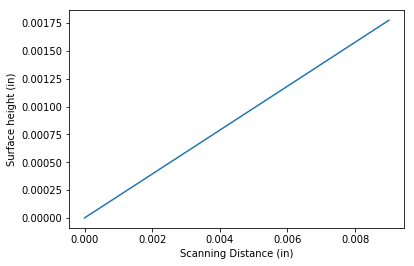

In [16]:
#Plot of surface with angle
import matplotlib.pyplot as plt
profile_plot = np.ndarray.flatten(surface_profile)

plt.ylabel('Surface height (in)')
plt.xlabel('Scanning Distance (in)')
plt.plot(x_mean,profile_plot)

np.savetxt("curved_profile_angle.csv", profile_plot, delimiter=",", fmt = '%s')

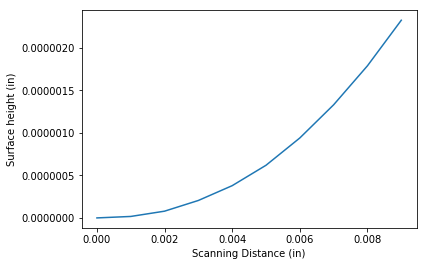

In [17]:
#Plot of surface without angle
angle_slope = dx[0,0]
profile_plot = np.ndarray.flatten(surface_profile)
for i in range(np.size(profile_plot)):
    profile_plot[i] = profile_plot[i] - angle_slope*x_mean[i]

import matplotlib.pyplot as plt
plt.ylabel('Surface height (in)')
plt.xlabel('Scanning Distance (in)')
plt.plot(x_mean,profile_plot)

np.savetxt("curved_profile_noangle.csv", profile_plot, delimiter=",", fmt = '%s')